# Titanic-Survival-Predictions With Logistic Regression

In [404]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import sklearn.metrics as sm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
import random  

# Loading the Dataset

In [405]:
Data=pd.read_csv("E:\\titanic_train.csv")

In [406]:
Data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Get Null Values in Dataset

In [407]:
Data.isnull().sum()/Data.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

# making feature selection 

As we see [Cabin , Age ] have null values 

but Cabin have more than (77%) null value so we will drop it

[Name] feature is not important as it not effect on which person  died or still alive Name feature is not important as it not effect on which person  died or still alive so we will drop this feature

also [Ticket] not important

In [408]:
Data=Data.drop(['Cabin','Name','Ticket'],axis=1)
Data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


# Fill null Values

In [409]:
median=Data['Age'].median()
Data['Age']=Data['Age'].fillna(median)
Data['Age'].isnull().sum()

0

C:\Users\ahmed\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


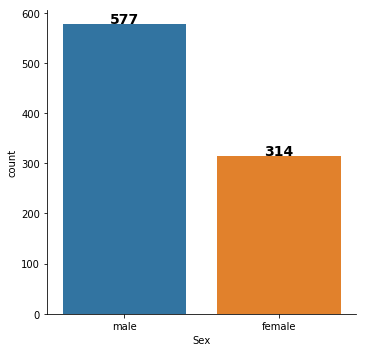

In [441]:
import seaborn as sns
plot=sns.factorplot('Sex',data=Data,kind='count')
for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i, # bar index (x coordinate of text)
        h+10, # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=14)

C:\Users\ahmed\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


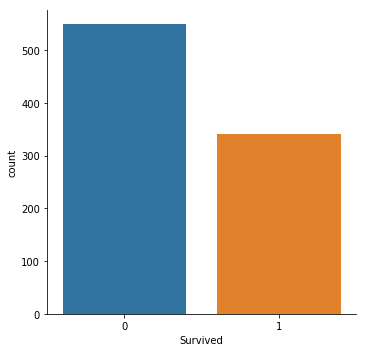

In [442]:
sns.factorplot('Survived',data=Data,kind='count') 

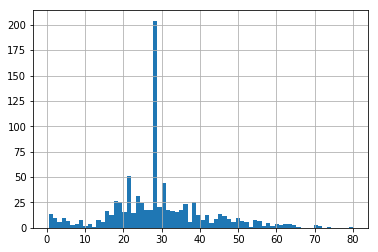

In [443]:
Data['Age'].hist(bins=70)


In [444]:
features=Data
target=Data[['Survived']]

In [445]:
features=features.drop(['Survived'],axis=1)

# Dael with label features

In [446]:
features = pd.get_dummies(features)

# Use Cross-Validation

In [447]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.33,random_state=42)

# Train the model

In [448]:
from sklearn.linear_model import LogisticRegression

In [449]:
model=LogisticRegression()

In [450]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [451]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_test, y_pred)
print(train_accuracy)

0.8135593220338984


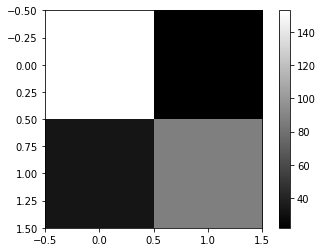

In [452]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray)
plt.colorbar()

In [453]:
confusion_mat

array([[153,  22],
       [ 33,  87]], dtype=int64)

In [454]:

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=None,train_sizes=np.linspace(0.1, 1.0, 10)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
    estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
    scoring = 'neg_mean_squared_error')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")   
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ahmed\Anaconda3\lib\site-packages\skl

<module 'matplotlib.pyplot' from 'C:\\Users\\ahmed\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

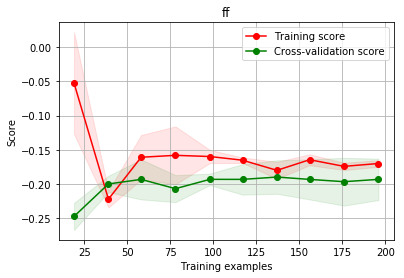

In [455]:
plot_learning_curve(model,"ff",x_test,y_test)